In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

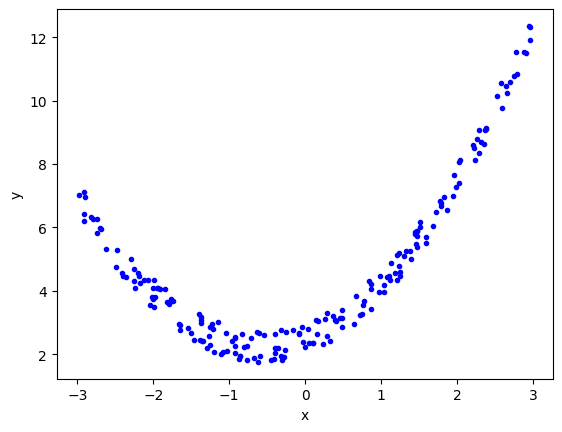

In [9]:
# craete independent and dependent variable for polynomial
x = 6 * np.random.rand(200,1) - 3
# y = 0.8x^2 + 0.9x + 2
y = 0.8 * (x**2) + 0.9 * x + 2 + np.random.rand(200,1)
# plot x and y
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [12]:
# applying linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
r2_score(y_test,y_pred)

0.37971464029318147

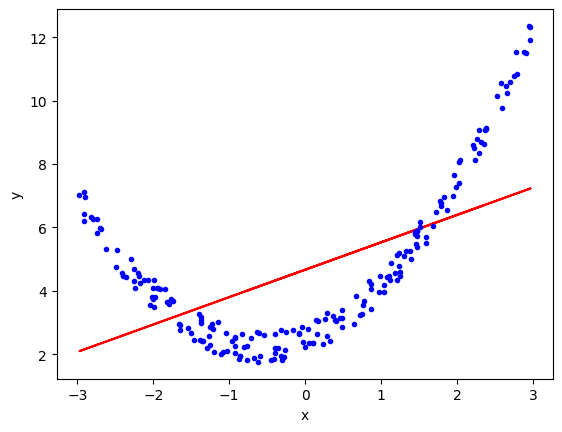

In [14]:
# plot simple regression line on data
plt.plot(x_train, lr.predict(x_train), color='r')
plt.plot(x,y,'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
# Applying polynomial linear regression
poly = PolynomialFeatures(degree=2, include_bias=True)

x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
print(x_train[0])
print(x_train_trans[0])

[2.34983715]
[1.         2.34983715 5.52173462]


In [16]:
from functools import lru_cache
lr_poly = LinearRegression()
lr_poly.fit(x_train_trans, y_train)
y_pred_poly = lr_poly.predict(x_test_trans)
r2_score(y_test, y_pred_poly)

0.9863991161329044

In [18]:
print('coef_ : ',lr_poly.coef_)
print('intercept_ : ',lr_poly.intercept_)

coef_ :  [[0.         0.9017816  0.79222356]]
intercept_ :  [2.51710424]


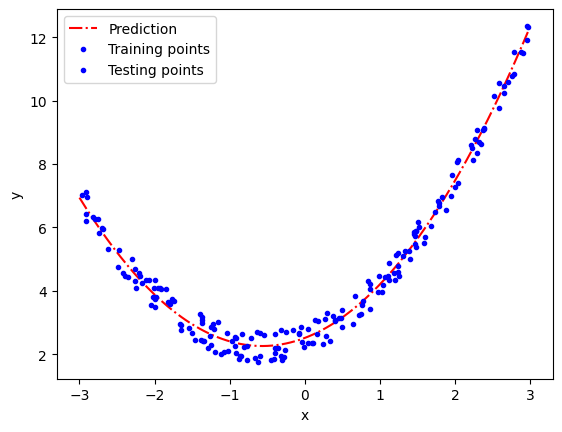

In [19]:
x_new = np.linspace(-3, 3, 200).reshape(200,1)
x_new_poly = poly.transform(x_new)
y_new = lr_poly.predict(x_new_poly)
plt.plot(x_new, y_new, 'r-.',label='Prediction')
plt.plot(x_train, y_train, 'b.',label='Training points')
plt.plot(x_test, y_test, 'b.',label='Testing points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()